# Case study on Unsupervised Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the dataset to the python environment.

In [2]:
df=pd.read_csv("wine.csv")

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

##### There is no null values and all dtypes are numeric

## 2. Try out different clustering models in the wine dataset.

### a.KMeans Clustering

E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for cluster 2 is : 0.657
Silhouette Score for cluster 3 is : 0.571
Silhouette Score for cluster 4 is : 0.557
Silhouette Score for cluster 5 is : 0.549
Silhouette Score for cluster 6 is : 0.566
Silhouette Score for cluster 7 is : 0.562
Silhouette Score for cluster 8 is : 0.540
Silhouette Score for cluster 9 is : 0.531
Silhouette Score for cluster 10 is : 0.520


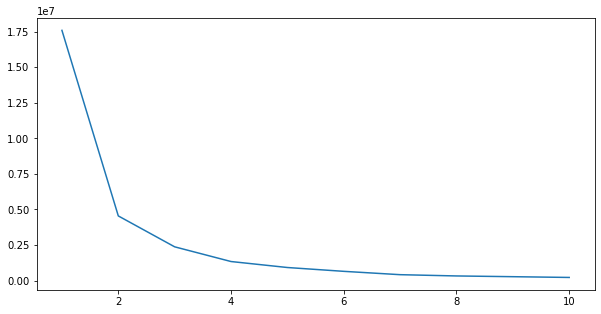

In [7]:
plt.figure(figsize=(10,5))
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)    
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    label = kmeans.fit_predict(df)
    score = silhouette_score(df, label, metric='euclidean')
    print('Silhouette Score for cluster',i,'is : %.3f' % score)
plt.plot(range(1,11),wcss)
plt.show()

## 3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

##### For cluster = 2 silhouette score is higher. that means cluster 2 is better

In [8]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state=42)
labels = kmeans.fit_predict(df)
labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

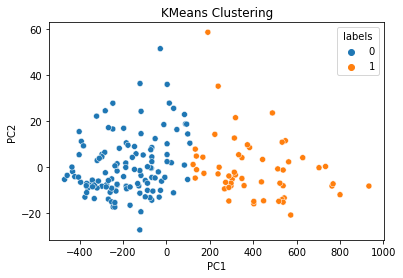

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
a = pd.DataFrame(pca.fit_transform(df), columns=["PC1", "PC2"])
a['labels'] = labels
sns.scatterplot(x=a['PC1'],y=a['PC2'],hue=a['labels'])
plt.title("KMeans Clustering")
plt.show()

#### Normalizing the data

In [10]:
from sklearn import preprocessing
X=preprocessing.normalize(df)
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.018364,0.007568,0.003282,0.027460,0.127252,0.002250,0.000817,0.000697,0.001420,0.010314,0.000857,0.002331,0.991225
174,0.017691,0.005162,0.003274,0.030366,0.134666,0.002376,0.000990,0.000568,0.001862,0.009638,0.000924,0.002060,0.990194
175,0.015723,0.005071,0.002678,0.023697,0.142180,0.001884,0.000818,0.000509,0.001600,0.012085,0.000699,0.001848,0.989336
176,0.015514,0.003051,0.002792,0.023559,0.141355,0.001944,0.000801,0.000624,0.001720,0.010955,0.000707,0.001908,0.989482


E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for cluster 2 is : 0.358
Silhouette Score for cluster 3 is : 0.357
Silhouette Score for cluster 4 is : 0.264
Silhouette Score for cluster 5 is : 0.243
Silhouette Score for cluster 6 is : 0.125
Silhouette Score for cluster 7 is : 0.061
Silhouette Score for cluster 8 is : 0.078
Silhouette Score for cluster 9 is : 0.055
Silhouette Score for cluster 10 is : 0.009


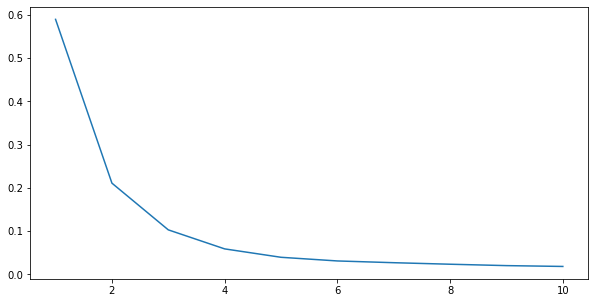

In [11]:
plt.figure(figsize=(10,5))
wcss_nor = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss_nor.append(kmeans.inertia_)
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    label = kmeans.fit_predict(X)
    score = silhouette_score(df, label, metric='euclidean')
    print('Silhouette Score for cluster',i,'is : %.3f' % score)
plt.plot(range(1,11),wcss_nor)
plt.show()

##### Here also, for cluster = 2 silhouette score is higher. that means cluster 2 is better

In [12]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state=42)
labels_nor = kmeans.fit_predict(X)
labels_nor

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1])

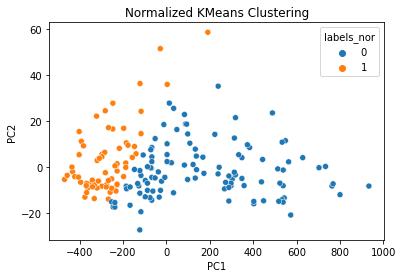

In [13]:
pca = PCA(n_components = 2)
b = pd.DataFrame(pca.fit_transform(df), columns=["PC1", "PC2"])
b['labels_nor'] = labels_nor
sns.scatterplot(x=b['PC1'],y=b['PC2'],hue=b['labels_nor'])
plt.title("Normalized KMeans Clustering")
plt.show()

### b.Hierarchical clustering- Agglomerative Clustering

#### dendrogram

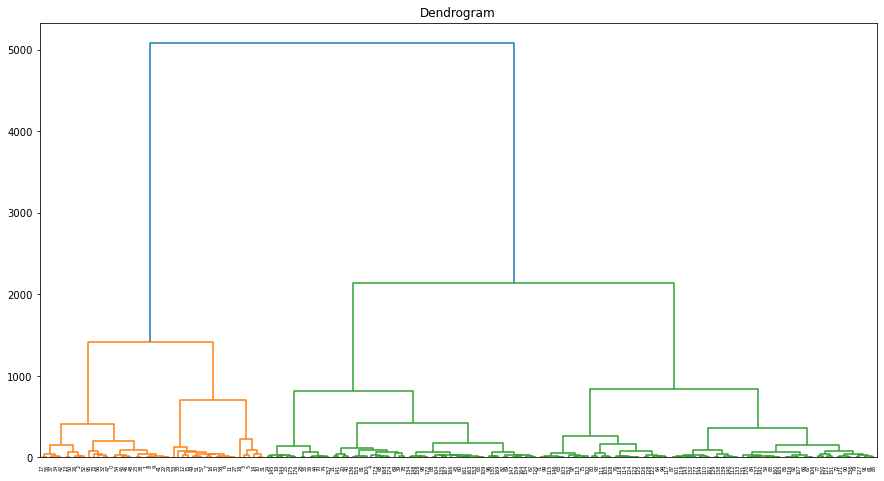

In [14]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(df,method="ward")
plt.figure(figsize=(15,8))
dendrogram(linked,orientation="top",distance_sort="ascending",show_leaf_counts=True)
plt.title("Dendrogram")
plt.show()

#### Silhouette score

In [15]:
from sklearn.cluster import AgglomerativeClustering
for i in range(2,12):
    cluster=AgglomerativeClustering(n_clusters=i,affinity="euclidean",linkage="ward")
    labels_h=cluster.fit_predict(df)
    score_hc = silhouette_score(df, labels_h, metric='euclidean')
    print('Silhouette Score for cluster',i,'is : %.3f' % score_hc)

Silhouette Score for cluster 2 is : 0.659
Silhouette Score for cluster 3 is : 0.564
Silhouette Score for cluster 4 is : 0.561
Silhouette Score for cluster 5 is : 0.507
Silhouette Score for cluster 6 is : 0.527
Silhouette Score for cluster 7 is : 0.537
Silhouette Score for cluster 8 is : 0.530
Silhouette Score for cluster 9 is : 0.531
Silhouette Score for cluster 10 is : 0.522
Silhouette Score for cluster 11 is : 0.498


##### Dendrogram and silhouette score suggest that cluster 2 is better

In [16]:
cluster=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
labels_hc=cluster.fit_predict(df)
labels_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

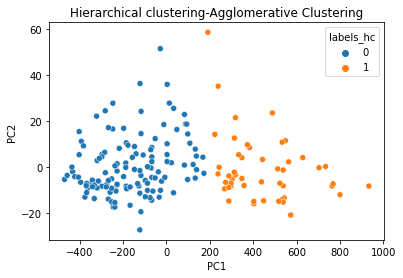

In [17]:
pca = PCA(n_components = 2)
c = pd.DataFrame(pca.fit_transform(df), columns=["PC1", "PC2"])
c['labels_hc'] = labels_hc
sns.scatterplot(x=c['PC1'],y=c['PC2'],hue=c['labels_hc'])
plt.title("Hierarchical clustering-Agglomerative Clustering")
plt.show()

#### Normalized dendrogram

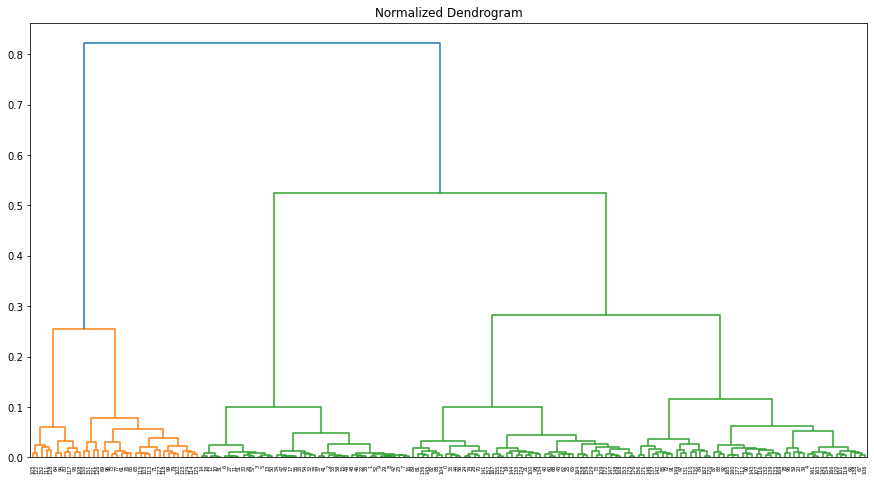

In [18]:
linked=linkage(X,method="ward")
plt.figure(figsize=(15,8))
dendrogram(linked,orientation="top",distance_sort="ascending",show_leaf_counts=True)
plt.title("Normalized Dendrogram")
plt.show()

#### Normalized Silhouette score

In [19]:
for i in range(2,12):
    cluster=AgglomerativeClustering(n_clusters=i,affinity="euclidean",linkage="ward")
    labels_h=cluster.fit_predict(X)
    score_hc = silhouette_score(X, labels_h, metric='euclidean')
    print('Silhouette Score for cluster',i,'is : %.3f' % score_hc)

Silhouette Score for cluster 2 is : 0.537
Silhouette Score for cluster 3 is : 0.504
Silhouette Score for cluster 4 is : 0.469
Silhouette Score for cluster 5 is : 0.488
Silhouette Score for cluster 6 is : 0.438
Silhouette Score for cluster 7 is : 0.386
Silhouette Score for cluster 8 is : 0.383
Silhouette Score for cluster 9 is : 0.374
Silhouette Score for cluster 10 is : 0.364
Silhouette Score for cluster 11 is : 0.357


##### Here also, Dendrogram and silhouette score suggest that cluster 2 is better

In [20]:
cluster=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
labels_hcn=cluster.fit_predict(X)
labels_hcn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

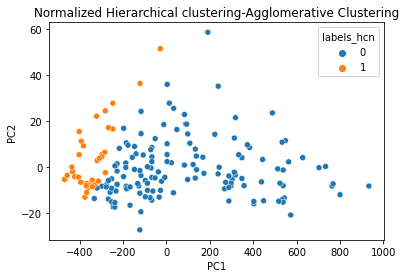

In [21]:
pca = PCA(n_components = 2)
d = pd.DataFrame(pca.fit_transform(df), columns=["PC1", "PC2"])
d['labels_hcn'] = labels_hcn
sns.scatterplot(x=d['PC1'],y=d['PC2'],hue=d['labels_hcn'])
plt.title("Normalized Hierarchical clustering-Agglomerative Clustering")
plt.show()

In [22]:
df["Label"]=labels_hc
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


### CONCLUSION: Based on Silhoutte score the best performing model is Agglomerative Clustering for K=2 and the data set is classified as well as added a new feature 'label' as 0 and 1  according to Agglomerative Clustering  